# Introduction to Neural Net Computing

The idea of connectionist computing was inspired by the neuron in the human brain 
and started with the Perceptron in the late 1950s. After inital high hopes progress in the field slowed
down somewhat. In recent years a number of discoveries led to renewed interest in artificial neural nets
and to the field of deep learning which quickly achieved amazing results in many practical
applications.

## The Perceptron

The perceptron is still a good model for the general idea of connectionist computing. In its simplest form
the Perceptron makes a yes/no decision based on a number of numeric
inputs. These values are multiplied by weights and summed; the output is derived from
whether the sum exceeds a defined threshold t. The answer can be taken as whether or not
the input belongs to a certain class.

$$ \begin{equation}
    o =
    \begin{cases}
      1, & \text{if}\ \sum x_i w_i > t \\
      0, & \text{otherwise}
    \end{cases}
  \end{equation} $$

In vector notation we can write this more concisely; the inner product (or dot product) combines the
element-wise multiplication and the summation.

$$ o = {\bf x} \cdot {\bf w} > t $$

The weights are initialized randomly and then updated after each observation according to a learning rule.
For certain types of problems the perceptron weights will converge, given suitable parameters. 

To train the perceptron the output $o$ is computed for each observation individually; it
is compared with the proper answer $y$ to derive an update for the weights:

$$ {\bf \Delta w} = l (y - o) {\bf x} $$

If the learning rate $l$ is chosen with care then the perceptron will converge to a 
final weight vector ${\bf w}$,
provided that the problem is linearly separable i.e. we can draw a line or hyperplane in the inputs ${\bf X}$
that partitions them into the two classes. This is best shown with an example.

The Iris dataset is often used to illustrate machine learning methods, and with good reason. It is a freely
available dataset of moderate size that contains observations on three classes, species of Iris flowers.

In [32]:
!wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2022-12-02 17:21:22--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



Download the file iris.data and put it into the same directory as the notebook.

We will use the Python package Numpy to import the data and the package matplotlib for plotting.

In [33]:
import numpy as np

data = np.genfromtxt('iris.data', delimiter=',', usecols=(0,1,2,3))
print(data[:5,])
print(data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150, 4)


There are 150 observations with 4 values each. The last column in the data file contains the name of the species; 
we will encode that separately.

To illustrate the perceptron learning rule we will first focus on the species of Iris that are linearly
separable, in this case the first 100 observations.

In [34]:
X = data[:100,]

We construct the proper classes from the knowledge that in this dataset the first 50 observations belong to
class 0, and the next 50 to class 1.

In [35]:
y = np.zeros(100)
y[50:] = 1

To illustrate to idea of the data being linearly separable we plot these observations.

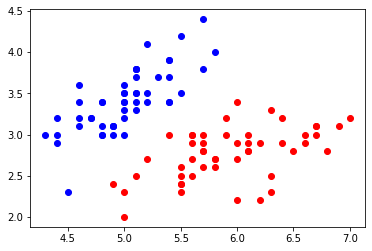

In [36]:
import matplotlib.pyplot as plt

plt.plot(X[:50,0], X[:50,1], 'o', c='b')
plt.plot(X[50:,0], X[50:,1], 'o', c='r')
plt.show()

- We can find a straight line that separates the data points into the two classes perfectly. 
- In fact, we can find many such lines. 
- Correspondingly, the perceptron converges to different final weights, depending on the initial random weights.

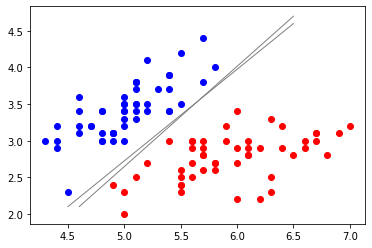

In [37]:
plt.plot(X[:50,0], X[:50,1], 'o', c='b')
plt.plot(X[50:,0], X[50:,1], 'o', c='r')
plt.plot([4.5, 6.5], [2.1, 4.6], linewidth=1, c='grey')
plt.plot([4.6, 6.5], [2.1, 4.7], linewidth=1, c='grey')
plt.show()

Now we initialize the weights randomly. 

- The weight vector must correspond in size to the input vector for each observation, in this case 4 elements. 
- The values for the weights will be in the range [0,1].

In [38]:
np.random.seed(seed=1)
w = np.random.rand(4)

We set the threshold to 0.5, but other values such as 0 or 1 would also work, since with corresponding
weights we can push the sum towards any given threshold.

In [39]:
t = 0.5

We are now ready to apply the perceptron decision rule to the first observation i.e. the first row in matrix
${\bf X}$.

To get a numeric value from the output we cast the boolean to float.

In [40]:
o = float(np.dot(X[0,], w) > t)
print(o)
print(y[0])

1.0
0.0


Since the correct answer for the first observation should be 0 we have an error. 

The learning rule
describes the steps to train the perceptron; since these will be repeated many times we define
a function.

In [41]:
def percep(X, y, t, steps, l):
    w = np.random.rand(4)
    for j in range(steps):
        for i in range(X.shape[0]):
            o = float(sum(X[i,] * w) > t)
            w += l * (y[i] - o) * X[i,] 
    return w

w = percep(X, y, t, 10, 0.02)

print(w)

[-0.06124411 -0.08166141  0.20626021  0.36956073]


The perceptron has now been trained, and we can apply the weights to the input data.

- With the Numpy function dot() we can do matrix-vector multiplication $ {\bf X w} $ easily.
- Each element in the resulting vector is compared with the threshold;
- the resulting boolean vector is multiplied by 1.0 to turn it into a numeric vector.

In [42]:
print((np.dot(X, w)>t)*1.0)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


The two classes are identified perfectly. Sadly, the perceptron cannot perform in this manner if the
problem is not linearly separable. 

While the first two classes in the dataset are linearly separable, the last two are not.
We can see this immediately by plotting; here we only plot the first and second column, but other
combinations result in similar pictures.

We put the last two classes in our X matrix of observations. The y vector of correct classes does not need
to be changed, we just treat the new classes coded in the same way, by 0 and 1.

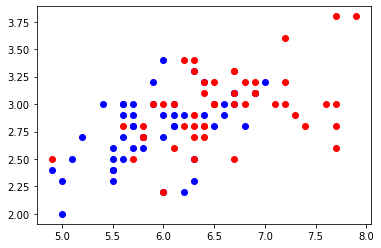

In [43]:
X = data[50:,]

plt.plot(X[:50,0], X[:50,1], 'o', c='b')
plt.plot(X[50:,0], X[50:,1], 'o', c='r')
plt.show()

When we try to apply the perceptron algorithm to this task it cannot succeed completely, even with a very high
number of epochs and a very small learning rate.

In [44]:
w = percep(X, y, t, 1000, 0.001)

print(w)

print((np.dot(X, w)>t)*1.0)

[-0.11703253 -0.15878327  0.22099451  0.4123195 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


Since many practical problems fall in the later class a more sophisticated
approach is needed. However, it builds on the ideas expressed in the perceptron.

## The Single-Layer Single-Output Neural Net

This simplest case of an artificial neural net is very close to a perceptron. 

- There is only one layer of weights between input and output. 
- With only one output node the weights are a vector with the same length as the number of input values.

The artificial neural net is typically illustrated with an image like the following:

<p align=center><img src=nn1.jpg border=0>

This looks nice, but it is not particularly helpful. It is actually more practical to use
mathematical notation.

For the computation on 
- an observation $(x_1, x_2, x_3)$ 
- with target value $t$
- we take the weighted sum of the input values and use it as input for 
- a non-linear activation function $f$ 
- The difference between output and target value is the error $\epsilon$

$$
\begin{align}
a & = f(x_1 w_1 + x_2 w_2 + x_3 w_3) \\
\epsilon & = a - t
\end{align}
$$

We have $N$ observations in the dataset which means we have $N$ values for $\epsilon$:

$$ \epsilon_n = f(x_{n,1} w_1 + x_{n,2} w_2 + x_{n,3} w_3) - t_n $$

&star; Note that 
- inputs $x_{n,i}$ and target values $t_n$ are given 
- the errors $\epsilon_n$ depend only on the weights $w_i$

Instead of using a specific given learning rule as in the perceptron we transform the 
learning task into an optimization problem:

- We define a cost function $E({\bf \epsilon})$ that assigns a single cost value to the list of
errors ${\bf \epsilon}$.

- This allows us to choose among diffent optimization methods
for finding the weights $w_i$ that minimize $E$.

### Activation Function

The sigmoid function is a common choice for the activation function. 
- Its result is bounded by [0,1],
- and it has a nice and simple derivative.

$$ f(z) = \frac{1}{1 + e^{-z}} $$

$$ f'(z) = f(z)(1 - f(z)) $$

&star; To see why, remember that 

$$ 
\begin{align}
f(x) & = a^x \\
f'(x) & = a^x \ln a 
\end{align}
$$

and therefore

$$
\begin{align}
f(x) & = e^x \\
f'(x) &  = e^x \\
\end{align}
$$

since 

$$ \ln e = 1 $$

The chain rule says that for some
function 
$F(x) = f(g(x))$ we know that $F'(x) = f'(g(x)) g'(x)$

The sigmoid function is

$$ f(x) = \frac{1}{1 + e^{-x}} = (1 + e^{-x})^{-1} $$

Apply the chain rule and we get

$$ f'(x) = -(1 + e^{-x})^{-2} (-e^{-x}) $$

Write this as

$$ = \frac{e^{-x}}{(1 + e^{-x})^2} 
= \frac{1}{1 + e^{-x}} * \frac{e^{-x}}{1 + e^{-x}} $$

Here is the trick -- add and subtract 1 in the second term of the product (we can always do that!):

$$ = \frac{1}{1 + e^{-x}} * \frac{1 + e^{-x} - 1}{1 + e^{-x}} $$

and now we can do this:

$$ = \frac{1}{1 + e^{-x}} 
\left( \frac{1 + e^{-x}}{1 + e^{-x}} - \frac{1}{1 + e^{-x}} \right)
= \frac{1}{1 + e^{-x}} 
\left( 1 - \frac{1}{1 + e^{-x}} \right)
$$

which means that the derivative of the sigmoid is indeed $ f'(x) = f(x) (1 - f(x)) 
~~~\blacksquare $

We use the Python lambda syntax for the function definition, it brings the code closer to the notation.
- it simply means that f is a function of x, and
- the expression is the result 

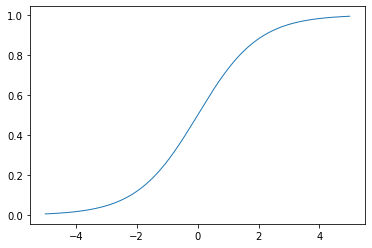

In [45]:
f = lambda x: 1. / (1. + np.exp(-x))

xs = np.arange(-5, +5, .01)
plt.plot(xs, f(xs), lw=1)
plt.show()

### Cost Function

We choose a cost function that sums the squares of the errors over all observations:

$$ E = \sum_n^N \frac{1}{2} (a_n - t_n)^2 $$

This particular function has some desirable properties:

- it is always positive
- it emphasizes large errors
- it is easy to find the derivative with respect to the weights

The last point allows us to find the gradient of the error function. 
- We use this for learning the weights by starting with random values 
- and then proceed with updates in the direction of the gradient towards lower errors.

### Derivative

The derivative of a function $f$ is the change in $f(x)$ caused by a small change in $x$.



In the plot below the function and its derivative are

$$
\begin{align}
g(x) & = 2 x^4 + x^3 - 3 x^2 + 1 \\
g'(x) & = 8 x^3 + 3 x^2 - 6 x
\end{align}
$$

Remember the derivative of polynomials:

- each term in the sum is treated separately
- terms with constants only disappear
- $ c \cdot x^p$ becomes $c \cdot p \cdot x^{p-1}$

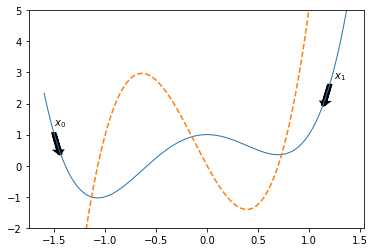

In [46]:
g = lambda x: 2*x**4 + x**3 - 3*x**2 + 1
g_ = lambda x: 8 * x**3 + 3 * x**2 - 6 * x

xs = np.arange(-1.6, +1.4, 0.01)
ys = g(xs) 
plt.plot(xs, ys, lw=1)
plt.plot(xs, g_(xs), '--')
x0 = -1.5
y0 = g(x0) 
dx = 0.05
dy = g_(x0)
plt.arrow(x0, y0, dx, dy*dx, linewidth=5)
plt.text(-1.5, 1.3, '$x_0$')
x1 = 1.2
plt.arrow(x1, g(x1), -dx, -dx*g_(x1), linewidth=5)
plt.text(1.25, 2.8, '$x_1$')
plt.ylim(-2, 5) 
plt.show()

- The solid line shows $g(x)$
- The dashed line shows the derivative $g'(x)$

The arrow at $x_0$ illustrates the direction towards descent:
- the black line is the tangent to the curve
- the derivative at that point is negative
- with increasing $x$ the value of $y$ decreases

By using small steps in the direction of the arrow we can approach the minimum:
- start at some point $x_0$
- proceed in small x-steps in the direction of the arrow while $y$ decreases
- stop when $y$ increased; decrease step size, and continue

The plot illustrates a basic problem of this approach:

- We can get closer to the minimum of a function with each step if
  - we use a sufficiently small step size, and
  - we start at the proper point (such as $x_0$)
- However, if 
  - we have a function with more than one minimum, and
  - we start at the wrong point (such as $x_1$),
  - we will only find a local minimum

### Gradient

The gradient of a function is the collection of all its partial derivatives into a vector.

The gradient of $f(x,y)$ at point $x_0,y_0$ is

$$
\nabla f(x_0, y_0) =
\left[
\begin{array}{c}
\frac{\delta f}{\delta x} (x_0,y_0) \\
\frac{\delta f}{\delta y} (x_0,y_0) \\
\end{array}
\right]
$$

- When we compute the gradient at a given point we get a vector as a result.

- This vector points in the direction of steepest ascent (or descent if multiplied by -1)

For our error function with two weights $v,w$ as parameters:

$$
\nabla E(v_0, w_0) =
\left[
\begin{array}{c}
\frac{\delta E}{\delta v} (v_0,w_0) \\
\frac{\delta E}{\delta w} (v_0,w_0) \\
\end{array}
\right]
$$

To illustrate this in a plot we **assume** the following very simple error function: 

$$ 
E(v,w)  = v^2 + w ^2
$$

The gradient is

$$
\nabla E =
\left[
\begin{array}{c}
\frac{\delta E}{\delta v}  \\
\frac{\delta E}{\delta w}  \\
\end{array}
\right] 
= 
\left[
\begin{array}{c}
2 v \\
2 w \\
\end{array}
\right]
$$

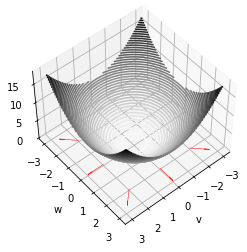

In [47]:
E = lambda v,w: v**2 + w**2
E_ = lambda v,w: [2*v, 2*w]

from mpl_toolkits.mplot3d import Axes3D

vs = np.linspace(-3, 3, 30)
ws = np.linspace(-3, 3, 30)
Xg, Yg = np.meshgrid(vs, ws)
Zg = [ [ E(v, w) for w in ws ] for v in vs ]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(Xg, Yg, Zg, 50, cmap='binary')
for g1, g2 in [[2,-2],[2,0],[2,2],[0,2],[-2,2]]: 
    ax.quiver(g1, g2, 0, g1 + E_(g1,g2)[0], g2 + E_(g1,g2)[1], 0,
    color = 'red', lw = 0.5, length=1, normalize=True)
ax.view_init(50, 50)
plt.xlabel('v')
plt.ylabel('w')
plt.show()

### Finding the Gradient: Derivative of the Cost Function

Our cost function is

$$ E = \sum_n^N \frac{1}{2} (a_n - t_n)^2 $$

Since the derivative of a sum is the sum of the derivatives we drop the sum for now and come back to it
when we calculate weight updates from several observations.

This leaves us with

$$ E = \frac{1}{2} (a - t)^2 $$

We want to find the derivative with respect to weight $w_i$:

$$ \frac{\delta E}{\delta w_i}  = \frac{\delta}{\delta w_i} \frac{1}{2} (a - t)^2  $$

Let

$$ 
\begin{align}
h & = \sum w_i  x_i \\
a & = f(h) 
\end{align}
$$

To get the derivative of a composite function $F(x) = f(g(x))$ 
we use the chain rule $F'(x) = f'(g(x)) g'(x)$

$$ 
\begin{align}
\frac{\delta E}{\delta w_i} & = (a - t) \frac{\delta a}{\delta w_i} \\
    & = (a - t) f'(h) \frac{\delta}{\delta w_i} \sum_j w_j x_j 
\end{align}
$$

Note that in the sum all terms $ j \ne i $ become constants with respect to $w_i$ and do not contribute to the derivative:

$$ \frac{\delta}{\delta w_i} \sum_j w_j x_j = \frac{\delta}{\delta w_i} 
[ w_1 x_1 + ... + w_i x_i + ... w_n x_n ] = x_i $$

This gives us the result:

$$ \frac{\delta E}{\delta w_i} =  (a - t) f'(h) x_i $$

For a specific activation function $f$ such as the sigmoid we can substitute $f'(h)$ with the derivative:

$$ \frac{\delta E}{\delta w_i} =  (a - t) f(h) (1 - f(h)) x_i $$

and with $ a = f(h) $

$$ \frac{\delta E}{\delta w_i} =  (a - t) a (1 - a) x_i $$

### Choice of Learning Rule: Gradient Descent

Having found the gradient i.e. the direction in terms of weights for decreasing error we add a small learning
rate $l$ to compute the weight updates:

$$ \Delta w_i = l \frac{\delta E}{\delta w_i} = - l (a - t) f'(h) x_i $$

Now we can re-introduce the outer sum over the observations ${\bf x}_n$ that we dropped earlier.

In our implementation we perform a step-wise gradient descent in the direction of lower error
by summing over $N$ input observations:

$$  w_i \leftarrow w_i + \sum_n \Delta w_i $$

### Dot Product

The dot product provides a neat way to write and (in Python) to compute matrix-vector multiplication:

$$ h = \sum_i w_i x_i = {\bf w} \cdot {\bf x}$$

where ${\bf w}$ is the weight vector and ${\bf x}$ is the input vector. 

Since we have a number of inputs we put them in a matrix ${\bf X}$
such that each line becomes an input vector. 

Then we
can write matrix-vector multiplication, ommitting the dot:

$$ {\bf h} = {\bf X w} $$

### Implementation

The dot() function in the Python package numpy performs exactly that computation. 

Another useful numpy feature is the automatic element-wise computation for vectors:

- when applying the sigmoid function ${\bf a} = f({\bf h})$ the result is again a vector with $a_i = f(h_i)$
- substracting vectors ${\bf e} = {\bf a} - {\bf y}$ the result is a vector with $e_i = a_i - y_i$
- the weight update is particularly neat as the dot() function here performs the multiplication and
summation for all observations ${\bf x}_n$ in one go

In [48]:
def f(x):
    return 1. / (1. + np.exp(-x))

def nn1(X, y, l=0.01, epochs=100):
    np.random.seed(1)
    w = np.random.rand(X.shape[1]) - 0.5
    for ep in range(epochs):
        h = np.dot(X, w)
        a = f(h)
        e = a - y
        #    np.dot(-l * (a - y) * f(h) * (1 - f(h)), X)
        w += np.dot(-l * (a - y) * a * (1 - a), X)
        if ep % (epochs/10) == 0: print(w, sum(e**2))
    return w, sum(e**2)

nn1(data[:100,], y)

[-0.0895291   0.16669807 -0.40610782 -0.15870961] 48.60860916394664
[ 0.11429247 -0.26485638  0.77556048  0.3125257 ] 15.894306438712007
[-0.21902946 -0.69684612  1.08170841  0.46485717] 2.200861955683641
[-0.24801321 -0.7898469   1.21898798  0.52614896] 1.5106042798638408
[-0.26824802 -0.85717496  1.31973269  0.57143128] 1.1511758310155364
[-0.28408774 -0.91006188  1.3990433   0.60731849] 0.9308381757382729
[-0.29708723 -0.95358     1.46442187  0.63706891] 0.7821150683613293
[-0.30810429 -0.99053712  1.52002957  0.66249741] 0.6750074099074249
[-0.31766104 -1.02264715  1.56841026  0.6847174 ] 0.5941903442088072
[-0.32609835 -1.05103188  1.61123096  0.7044608 ] 0.5310315917027568


(array([-0.33293015, -1.07403742,  1.64597433,  0.72053439]),
 0.4849217513403631)

We can see that with proper choice of learning rate the squared errors go towards zero; however, since the output
function is not a 0/1 step function as in the case of the perceptron, we do not achieve a sum of squares equal
to zero.

### Plotting the Search Space

It is interesting to take a look at the search space for our optimization problem. We will produce a plot that
shows the value of the cost function i.e. the sum of squared errors for a large number of parameters i.e. weights.

Since it is diffult to produce a surface plot for more than two parameters we limit this task to the first
two input columns of the dataset:

In [21]:
nn1(data[:100,:2], y)

[-0.08983118  0.13965073] 28.123267296089303
[ 0.0653539  -0.41963385] 27.666638294438435
[ 0.26978013 -0.81569334] 26.088923752035036
[ 0.46469016 -1.17950057] 23.3767376025301
[ 0.65324895 -1.51242081] 19.735513237843445
[ 0.83699223 -1.80027512] 15.553857557679851
[ 1.01197176 -2.02385275] 11.119024519621483
[ 1.17187998 -2.17311584] 7.532716073785758
[ 1.29267318 -2.28698322] 6.198296396775129
[ 1.37066393 -2.4030753 ] 5.770788513638253


(array([ 1.42835438, -2.5029961 ]), 5.47094753587409)

With fewer input data values the algorithm performs somewhat worse, which is to be expected.

We can easily compute the errors for given weights:

$$ 
\begin{align}
a_n & = f(\sum_i w_i x_{n,i}) \\
E & = \sum_n (a_n - t_n)^2 
\end{align}
$$

The following code plots $E$ for a suitable range of values for $w_1$ and $w_2$:

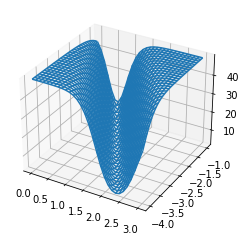

In [22]:
from mpl_toolkits.mplot3d import Axes3D

def plotE(X, y, g, view=None):
    w1 = np.linspace(g[0], g[1], 30)
    w2 = np.linspace(g[2], g[3], 30)
    Xg, Yg = np.meshgrid(w1, w2)
    n = w1.shape[0]
    E = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            h = np.dot(X, [Xg[i,j], Yg[i,j]])
            E[i,j] = sum((f(h) - y)**2)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    if view: ax.view_init(view[0], view[1])
    ax.plot_wireframe(Xg, Yg, E, rstride=1, cstride=1)
    plt.show()

plotE(data[:100,:2], y, [0, 3, -4, -1])

This surface shows a valley that is slowly flattening out.

A different view shows this more clearly.

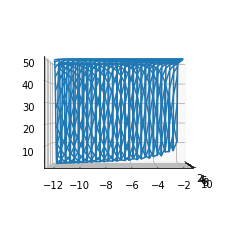

In [23]:
plotE(data[:100,:2], y, [1, 10, -12, -2], [0,0])

 
This leads us to the idea of going to much higher number of epochs in order to arrive at a better solution:

In [24]:
w, se = nn1(data[:100,:2], y, epochs=20000)

[-0.08983118  0.13965073] 28.123267296089303
[ 3.75388984 -6.52433156] 1.6209410339273478
[ 4.45663756 -7.72625005] 1.4214961568365865
[ 4.90942841 -8.49867514] 1.3405821831709452
[ 5.25379765 -9.0854201 ] 1.294088888142483
[ 5.5364573 -9.5667219] 1.2628533745420594
[ 5.77888204 -9.97939097] 1.2399084348276437
[  5.99279508 -10.34348885] 1.2220549897245478
[  6.18532606 -10.67119922] 1.207596333138687
[  6.36114841 -10.97049871] 1.1955390089984406


During the first few hundred epochs we see a large change in the error sum, but after that we are slowing down.

The problem is the gradient of the activation function.

### Vanishing Gradient

A problem with the sigmoid function is the vanishing gradient, caused by the fact that the derivative
of the sigmoid function goes towards zero quickly as we move past about [-5, 5]. This is obvious from plotting the function for a broader range:

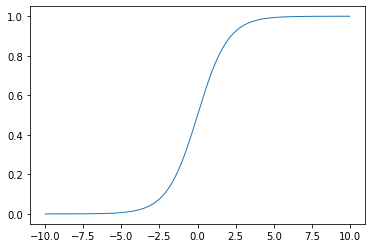

In [25]:
import numpy as np
xs = np.arange(-10, +10, .01)
ys = 1. / (1. + np.exp(-xs))
plt.plot(xs, ys, lw=1)
plt.show()

Beyond [-5, 5] the plot is practically flat; the derivative below shows the actual value of $f'$.



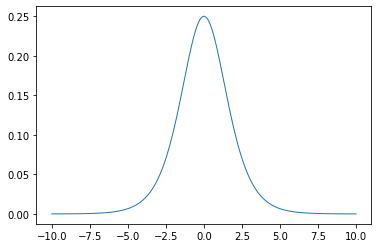

In [26]:
f = lambda x: 1. / (1. + np.exp(-x))

xs = np.arange(-10, +10, .01)
plt.plot(xs, f(xs)*(1 - f(xs)), lw=1)
plt.show()

Let's look at the average input sums for the output node:

In [27]:
np.mean(np.dot(data[:50,:2], w) )

-5.785226692811127

In [28]:
np.mean(np.dot(data[50:100,:2], w))

7.569465115562255

We find that we are already beyond the -5/+5 range where the derivative of the sigmoid function is starting
to flatten out.

What does this mean for our weight updates? 

In [29]:
h = np.dot(data[:50,:2], w)
a = f(h)
l = 0.005
np.dot(-l * (a - y[:50]) * f(h) * (1 - f(h)), data[:50,:2])

array([-0.00289847, -0.00171011])

The weight updates have become very small.

One obvious solution seems to be to simply increase the learning rate:

In [30]:
nn1(data[:100,:2], y, l=0.02)

[-0.09668437  0.05897696] 28.123267296089303
[-0.04332068 -0.88262183] 21.74186135407813
[ 0.22172608 -1.38153615] 17.164259964142985
[ 0.53935957 -1.8535406 ] 13.563633553284806
[ 1.23477896 -2.10317757] 38.939666838627126
[ 1.79085204 -2.40702559] 28.997660417409485
[ 2.14706152 -2.94090836] 21.163130848813093
[ 2.34545206 -3.45502516] 14.05291515146666
[ 2.27821096 -3.8207966 ] 4.04441242542362
[ 2.25709858 -3.94229108] 2.9253606188404695


(array([ 2.29396525, -4.01022839]), 2.8577486837731247)

This looks good, let's increase it further:

In [31]:
nn1(data[:100,:2], y, l=0.05)

[-0.11724392 -0.18304433] 28.123267296089303
[1.36232343 0.39286954] 49.967179238898794
[1.3154691  0.36129963] 49.9549114649393
[1.24582665 0.3143247 ] 49.92816148162881
[1.10884901 0.22175518] 49.827171745854976
[1.67439598 0.19221626] 49.98573226400721
[1.65606186 0.17981792] 49.9838073475192
[1.63503378 0.16559296] 49.9812806647
[1.61038255 0.14891044] 49.97781817657559
[1.58059772 0.12874433] 49.972783215922135


(array([1.54721182, 0.10612778]), 49.9657984134893)

Target overshot. The learning rate is a fickle parameter that needs to be chosen carefully.

Some gradient descent approaches change the learning rate during the training phase.

**EXERCISES**:

- find a dataset e.g. on the UCI site with one 1/0 output and several numeric inputs and apply the approach
  described here 
- you can choose to only include two inputs to make things a little simpler
- also try to plot the error surface map for a two-inputs/weights version of the problem
- we are not looking for good performance, just to get it to work at all i.e. see some improvement
  during training
- UCI Car Evaluation dataset: compare Perceptron and Single-layer NN

  https://archive.ics.uci.edu/ml/datasets/Car+Evaluation